Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Loading the dataset

In [ ]:
car = pd.read_csv('/content/CarPrice.csv')

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Finding the correlation to find out the relevant features for prediction

<AxesSubplot:>

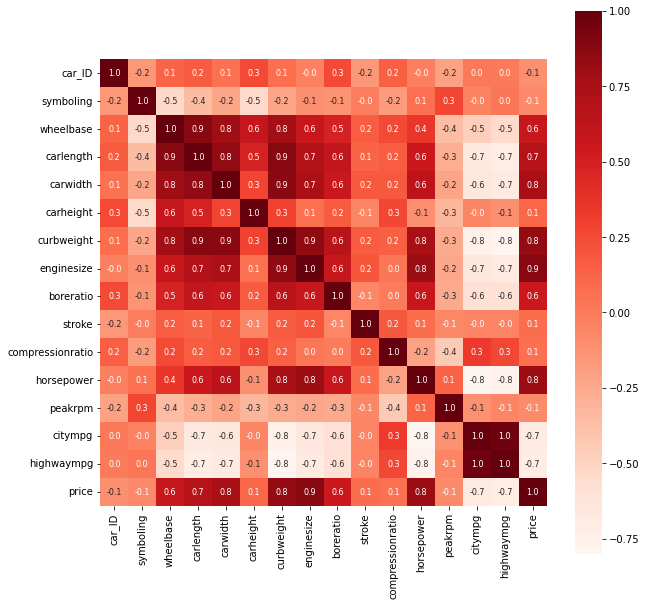

In [ ]:
#finding correlation between all the columns and the Price
correlation = car.corr()

#constructing the heatmap to understand the correaltion between the columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap='Reds')

In [ ]:
car = car.drop(columns=['car_ID'], axis = 1)

In [ ]:
car = car.drop(columns=['symboling', 'stroke', 'compressionratio', 'highwaympg', 'peakrpm', 'carheight'])

In [ ]:
car

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,22470.0


**FEATURE** **EXTRACTION**

Finding the unique variables

In [ ]:
car['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
car['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
car['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
car['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
car['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
car['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
car['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Mapping the categorical variables to the numeric values to consider for the correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mapping = {'gas': 1, 'diesel': 2}
car['fueltype'] = car['fueltype'].map(mapping)

In [ ]:
mapping = {'convertible': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5}
car['carbody'] = car['carbody'].map(mapping)

In [ ]:
mapping = {'two': 2, 'four': 4}
car['doornumber'] = car['doornumber'].map(mapping)

In [ ]:
mapping = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'two': 2, 'eight': 8}
car['cylindernumber'] = car['cylindernumber'].map(mapping)

In [ ]:
mapping = {'std': 1, 'turbo': 2}
car['aspiration'] = car['aspiration'].map(mapping)

In [ ]:
mapping = {'dohc':1, 'ohcv':2, 'ohc':3, 'l':4, 'rotor':5, 'ohcf':6, 'dohcv':7}
car['enginetype'] = car['enginetype'].map(mapping)

In [ ]:
mapping = {'rwd': 1, '4wd': 2, 'fwd':3}
car['drivewheel'] = car['drivewheel'].map(mapping)

In [ ]:
car = car.drop(columns = ['fuelsystem', 'enginelocation'])

In [ ]:
car = car.drop(columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'])

Finding the correlation (relevant feature) from new columns added

<AxesSubplot:>

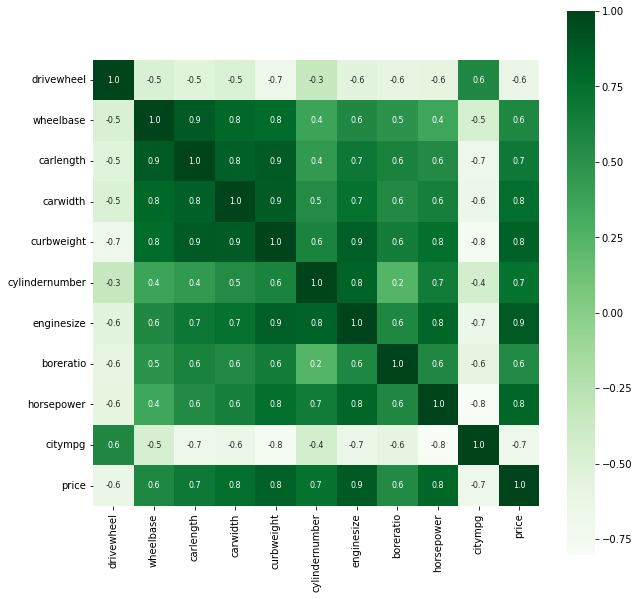

In [ ]:
#finding correlation between all the columns and the Price
correlation = car.corr()

#constructing the heatmap to understand the correaltion between the columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
X = car.drop(columns=['price'], axis = 1)

In [ ]:
y = car['price']

In [ ]:
X.shape

(205, 10)

In [ ]:
y.shape

(205,)

In [ ]:
X.isna().sum()

drivewheel        0
wheelbase         0
carlength         0
carwidth          0
curbweight        0
cylindernumber    1
enginesize        0
boreratio         0
horsepower        0
citympg           0
dtype: int64

In [ ]:
X = X.dropna(subset=['cylindernumber'], axis = 0)

In [ ]:
X.shape

(204, 10)

In [ ]:
y = y.iloc[:-1]

Spliting the dataset into training and testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting the dataset in the model for prediction

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Finding the performance metrics for the model

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 28118694.474828005


In [ ]:
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.662511357770625


Providing some input values to the dataset to predict the price

In [ ]:
new_data = np.array([1, 94.5 , 171.2, 65.5, 2823, 6, 152, 2.68, 154, 19])
X_new = new_data.reshape(1, -1)
predictions = model.predict(X_new)
print(predictions)

[18382.99578678]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
